**Pair Problem 07/16**

Explore the practice dataset by implementing a linear regression in five steps:

Plot each independent variable against the dependent variable and take note of any obvious relationships.

Break the data into a training set and a test set.

Build a few regression models using the training set. Each model is choosing what variables to include and doing this: model = sm.OLS(y_train, X_train) results = model.fit()

According to these models what can you say about the sign and certainty of the relationships between the variables in the data? Do the independent variables have a linear relationship with the dependent variable?

Apply the results of each of these regression models to predict the values the dependent variable should take on in the test sample. Compare the models using the adjusted R2 - which model performs the best in the test sample?

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.cross_validation import train_test_split 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('/Users/bellepeng/Desktop/Metis/sf18_ds11/class_lectures/week03-luther2/01-regularization/Practice_data.csv')
df.head()

,Ind_Variable_1,Ind_Variable_2,Ind_Variable_3,Ind_Variable_4,Ind_Variable_5,Ind_Variable_6,Dep_Variable
0,-0.662927,0.481136,0.247215,1.958167,4.470671,0.036799,4.945552
1,1.582828,0.306494,1.548229,-0.707931,1.871754,0.011579,-1.196168
2,-0.559416,0.022729,1.553344,0.147306,-3.719343,0.213217,-1.244103
3,-1.741017,0.366741,0.474254,0.111505,5.226183,0.327708,-2.516572
4,0.139236,0.244032,1.335525,-1.731315,0.091636,0.516423,-12.755672


In [3]:
df.corr()
# Var 3 & 4 have some corr with Dep_var

,Ind_Variable_1,Ind_Variable_2,Ind_Variable_3,Ind_Variable_4,Ind_Variable_5,Ind_Variable_6,Dep_Variable
Ind_Variable_1,1.000000,0.023919,-0.038987,-0.034490,-0.007855,0.014566,0.071343
Ind_Variable_2,0.023919,1.000000,-0.041725,-0.014973,0.009441,0.016941,-0.065982
Ind_Variable_3,-0.038987,-0.041725,1.000000,-0.048367,0.028579,0.004984,-0.274918
Ind_Variable_4,-0.034490,-0.014973,-0.048367,1.000000,0.005503,0.030361,0.676746
Ind_Variable_5,-0.007855,0.009441,0.028579,0.005503,1.000000,0.034862,-0.000751
Ind_Variable_6,0.014566,0.016941,0.004984,0.030361,0.034862,1.000000,0.012226
Dep_Variable,0.071343,-0.065982,-0.274918,0.676746,-0.000751,0.012226,1.000000


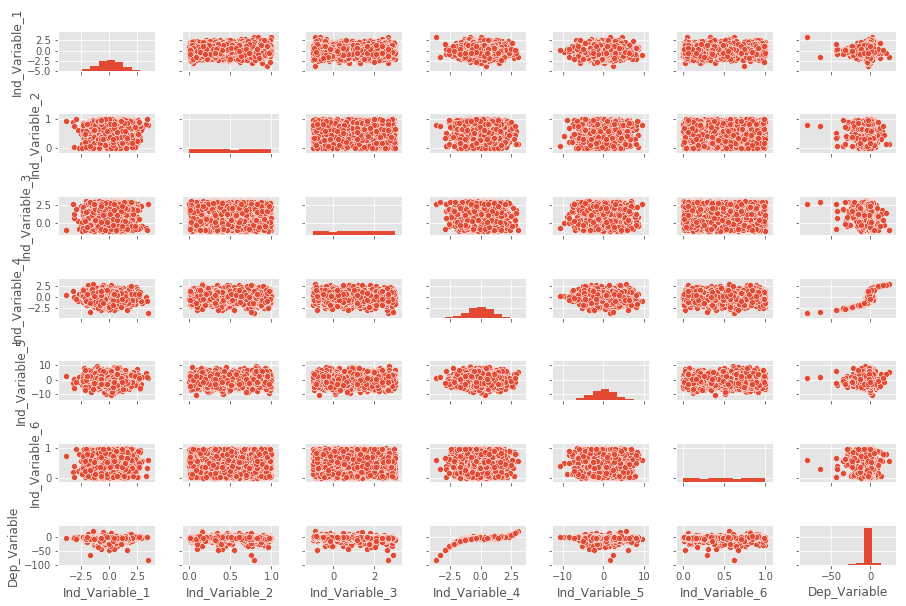

In [4]:
#looks like cubic with Var4
sns.pairplot(df, size = 1.2, aspect=1.5);

In [5]:
X = df[['Ind_Variable_1', 'Ind_Variable_2', 'Ind_Variable_3', 'Ind_Variable_4', 'Ind_Variable_5', 'Ind_Variable_6']]
y = df['Dep_Variable']
X.head()

,Ind_Variable_1,Ind_Variable_2,Ind_Variable_3,Ind_Variable_4,Ind_Variable_5,Ind_Variable_6
0,-0.662927,0.481136,0.247215,1.958167,4.470671,0.036799
1,1.582828,0.306494,1.548229,-0.707931,1.871754,0.011579
2,-0.559416,0.022729,1.553344,0.147306,-3.719343,0.213217
3,-1.741017,0.366741,0.474254,0.111505,5.226183,0.327708
4,0.139236,0.244032,1.335525,-1.731315,0.091636,0.516423


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Model 1**

In [7]:
model1 = sm.OLS(y_train, sm.add_constant(x_train))
results = model1.fit()
results.summary()
# Adj. R-squared: 0.523, first 4 are significant, not constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Dep_Variable   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     331.9
Date:                Mon, 16 Jul 2018   Prob (F-statistic):          2.89e-276
Time:                        10:15:56   Log-Likelihood:                -4318.7
No. Observations:                1600   AIC:                             8651.
Df Residuals:                    1593   BIC:                             8689.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1929      0.250     -0.771      0.441      -0.684       0.298
Ind_Variable_1     0.6131      0.090      6.807      0.000       0.436       0.790
Ind_Variable_2    -1.2264      0.314     -3.906      0.000      -1.842      -0.611
Ind_Variable_3    -1.1233      0.079    -14.239      0.000      -1.278      -0.969
Ind_Variable_4     3.7481      0.092     40.702      0.000       3.568       3.929
Ind_Variable_5     0.0009      0.031      0.030      0.976      -0.060       0.062
Ind_Variable_6    -0.1453      0.311     -0.468      0.640      -0.755       0.464
==============================================================================
Omnibus:                     1496.631   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88779.666
Skew:                          -4.227   Prob(JB):                         0.00
Kurtosis:                      38.500   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4.2829201555347201

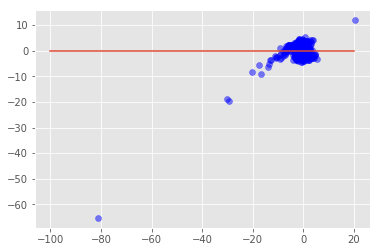

In [14]:
selected_columns_1=['Ind_Variable_1', 'Ind_Variable_2', 'Ind_Variable_3', 'Ind_Variable_4', 'Ind_Variable_5', 'Ind_Variable_6']
selected_columns_1
pred1 = results.predict(sm.add_constant(x_test.loc[:,selected_columns_1]))
plt.scatter(y_test,y_test-pred1,alpha=.5, color='b')
plt.plot(np.linspace(-100,20, 500),np.linspace(0,0,500))
np.sqrt(np.mean((y_test - pred1)**2))

**Model 2**

In [15]:
x_train['variable4_quad'] = x_train['Ind_Variable_4']**2
x_train['variable4_cub'] = x_train['Ind_Variable_4']**3
x_train['variable3_quad'] = x_train['Ind_Variable_3']**2
x_train['variable3_cub'] = x_train['Ind_Variable_3']**3
x_train.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Ind_Variable_1,Ind_Variable_2,Ind_Variable_3,Ind_Variable_4,Ind_Variable_5,Ind_Variable_6,variable4_quad,variable4_cub,variable3_quad,variable3_cub
785,2.225143,0.802562,1.803343,-0.781222,1.507925,0.606776,0.610308,-0.476786,3.252045,5.864552
1027,0.624236,0.112669,2.890176,1.390628,-1.350557,0.616814,1.933847,2.689262,8.353115,24.141969
282,0.984983,0.756169,2.086177,0.853327,-2.569431,0.302941,0.728167,0.621364,4.352133,9.079320
169,1.566985,0.884247,0.401056,-0.026620,0.022170,0.747934,0.000709,-0.000019,0.160846,0.064508
1755,-0.342744,0.964991,1.692183,-0.621295,-0.904353,0.128129,0.386008,-0.239825,2.863483,4.845537


In [12]:
model2 = sm.OLS(y_train, sm.add_constant(x_train))
results2 = model2.fit()
results2.summary()
# Adj. R-squared: 0.970, first 4, constant, var4^2, var4^3 are significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Dep_Variable   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     4624.
Date:                Mon, 16 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:16:52   Log-Likelihood:                -2243.8
No. Observations:                1600   AIC:                             4510.
Df Residuals:                    1589   BIC:                             4569.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0660      0.075     14.203      0.000       0.919       1.213
Ind_Variable_1     0.5579      0.025     22.601      0.000       0.509       0.606
Ind_Variable_2    -0.9969      0.086    -11.589      0.000      -1.166      -0.828
Ind_Variable_3    -1.0343      0.048    -21.459      0.000      -1.129      -0.940
Ind_Variable_4     0.2621      0.041      6.411      0.000       0.182       0.342
Ind_Variable_5     0.0008      0.008      0.095      0.924      -0.016       0.017
Ind_Variable_6     0.0337      0.085      0.394      0.694      -0.134       0.201
variable4_quad    -1.5081      0.018    -83.343      0.000      -1.544      -1.473
variable4_cub      1.1908      0.011    107.258      0.000       1.169       1.213
variable3_quad    -0.0667      0.065     -1.024      0.306      -0.194       0.061
variable3_cub      0.0132      0.020      0.646      0.518      -0.027       0.053
==============================================================================
Omnibus:                        1.161   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.066
Skew:                           0.054   Prob(JB):                        0.587
Kurtosis:                       3.065   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x_test['variable4_quad'] = x_test['Ind_Variable_4']**2
x_test['variable4_cub'] = x_test['Ind_Variable_4']**3
x_test['variable3_quad'] = x_test['Ind_Variable_3']**2
x_test['variable3_cub'] = x_test['Ind_Variable_3']**3
x_test.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Ind_Variable_1,Ind_Variable_2,Ind_Variable_3,Ind_Variable_4,Ind_Variable_5,Ind_Variable_6,variable4_quad,variable4_cub,variable3_quad,variable3_cub
1272,1.155784,0.781460,-0.253153,-0.372526,-1.925020,0.187035,0.138776,-0.051698,0.064086,-0.016224
200,1.520794,0.894328,-0.532490,-0.853901,-1.214634,0.548931,0.729147,-0.622620,0.283545,-0.150985
237,1.112342,0.038248,1.719385,1.062497,-0.014222,0.638555,1.128899,1.199451,2.956285,5.082993
1666,0.129893,0.326323,0.716596,1.560361,0.236112,0.050074,2.434726,3.799051,0.513509,0.367978
152,1.378338,0.841942,0.506168,0.986533,-5.434923,0.865992,0.973246,0.960139,0.256206,0.129683


1.017950481935473

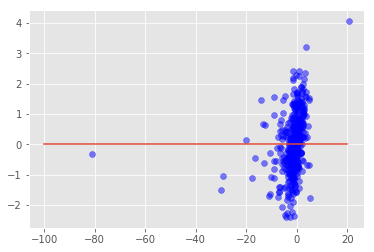

In [18]:
pred2 = results2.predict(sm.add_constant(x_test))
plt.scatter(y_test,y_test-pred2,alpha=.5, color='b')
plt.plot(np.linspace(-100,20, 500),np.linspace(0,0,500))
np.sqrt(np.mean((y_test - pred2)**2))